## Audio `Visualizer`

In [1]:
%pip install noisereduce 
%pip install matplotlib
%pip install pydub


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the audio file
audio_path = "/home/wambugumuchemi/Projects/listen-write/cleansegment1.mp3"
audio = AudioSegment.from_file(audio_path)

In [4]:
# Extract the raw audio data as NumPy array
samples = np.array(audio.get_array_of_samples())

In [5]:
# Calculate time values for the x-axis
duration = len(samples) / audio.frame_rate
time = np.linspace(0., duration, len(samples))

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/wambugumuchemi/Projects

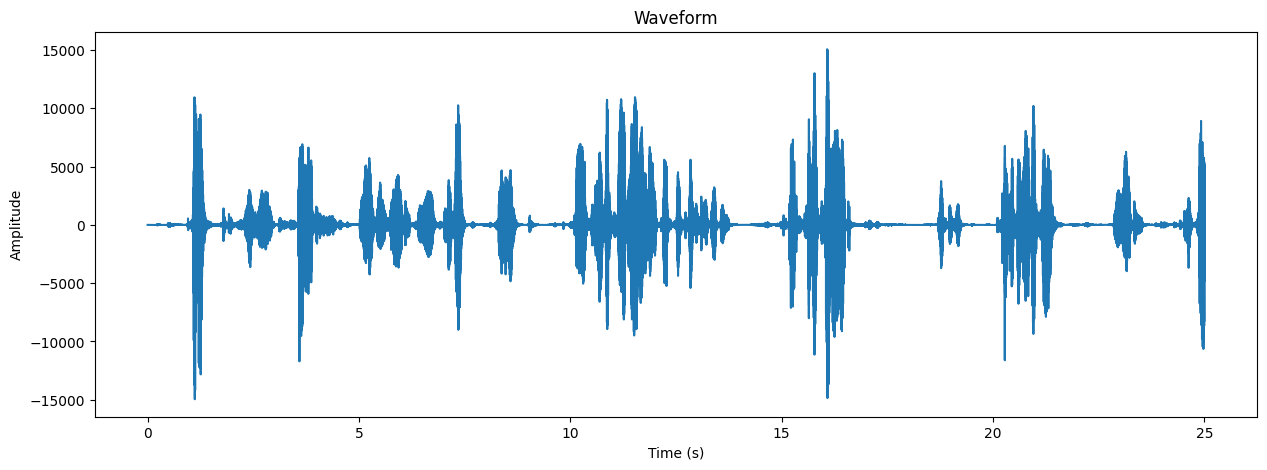

In [6]:
# Plot the waveform
plt.figure(figsize=(15, 5))
plt.plot(time, samples)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

In [7]:
#Lets create a function from above
def plot_waveform(audio_path):
    # Load the audio file
    audio = AudioSegment.from_file(audio_path)

    # Extract the raw audio data as NumPy array
    samples = np.array(audio.get_array_of_samples())

    # Calculate time values for the x-axis
    duration = len(samples) / audio.frame_rate
    time = np.linspace(0., duration, len(samples))

    # Plot the waveform
    plt.figure(figsize=(15, 5))
    plt.plot(time, samples)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [8]:
audio_file_path = "/home/wambugumuchemi/Projects/listen-write/audiobank/segment_1.mp3"
plot_waveform(audio_file_path)


FileNotFoundError: [Errno 2] No such file or directory: '/home/wambugumuchemi/Projects/listen-write/audiobank/segment_1.mp3'

 Audio `cleaning` : 
 *We will clean the audio using pydub and the noise reduce library*

In [9]:
from pydub import AudioSegment
import noisereduce as nr
import numpy as np

/home/wambugumuchemi/Projects/listen-write/env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
#Lets create a cleaning function
def clean_audio_advanced(audio_path, output_path):
    # Load audio
    audio = AudioSegment.from_file(audio_path, format="mp3")

    # Convert to NumPy array
    audio_array = np.array(audio.get_array_of_samples())

    # Provide the sampling rate (replace 'your_sampling_rate' with the actual value)
    sr = audio.frame_rate

    # Perform noise reduction using noisereduce
    reduced_audio_array = nr.reduce_noise(audio_array, sr)

    # Create a new AudioSegment from the cleaned NumPy array
    cleaned_audio = AudioSegment(
        reduced_audio_array.tobytes(),
        frame_rate=audio.frame_rate,
        sample_width=audio.sample_width,
        channels=audio.channels
    )

    # Export the processed audio to a new file
    cleaned_audio.export(output_path, format="mp3")

In [12]:
audio_path = "/home/wambugumuchemi/Projects/listen-write/audiobank/segment_1.mp3"
output_path = "/home/wambugumuchemi/Projects/listen-write/cleaned_audio/clean1.mp3"
clean_audio_advanced(audio_path, output_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/wambugumuchemi/Projects/listen-write/audiobank/segment_1.mp3'

In [13]:
#lets visualize the cleaned audio now, we can plot both non-cleaned and cleaned audio

#non-cleaned audio as first plot
audio_file_path = "/home/wambugumuchemi/Projects/listen-write/audiobank/segment_1.mp3"
plot_waveform(audio_file_path)

#cleaned audio as second plot
audio_file_path = "/home/wambugumuchemi/Projects/listen-write/cleaned_audio/clean1.mp3"
plot_waveform(audio_file_path)

FileNotFoundError: [Errno 2] No such file or directory: '/home/wambugumuchemi/Projects/listen-write/audiobank/segment_1.mp3'

Lets process the audio with `Silero VAD`

In [2]:
#Lets first convert mp3 to wav
from pydub import AudioSegment
def mp3converter(audiopath):
    sound = AudioSegment.from_mp3(audiopath)
    sound.export( "en_example.wav", format="wav")
    return "en_example.wav"

    
Audio("en_example.wav")

In [7]:
%pip install -q torchaudio
#%pip install torch
SAMPLING_RATE = 16000

import torch
torch.set_num_threads(1)

from IPython.display import Audio
from pprint import pprint
# download example
#torch.hub.download_url_to_file('https://models.silero.ai/vad_models/en.wav', 'en_example.wav')
torch.hub.download_url_to_file('http://197.248.0.197:8080/0354aabd17a0c295ea8465d430a9a3aa.mp3', 'en_example.mp3')
#audio_file = "/home/wambugumuchemi/Projects/listen-write/audio.wav"
#torch.hub.download_url_to_file('https://www.voiptroubleshooter.com/open_speech/american/OSR_us_000_0010_8k.wav', 'en_example.wav')

audio = "en_example.mp3"
mp3converter(audio)

Audio('en_example.wav')

Note: you may need to restart the kernel to use updated packages.


100%|██████████| 172k/172k [00:00<00:00, 2.59MB/s]


Using `ONNX`

In [8]:
USE_ONNX = False # change this to True / False if you want to test onnx model
if USE_ONNX:
    %pip install -q onnxruntime
  
model, utils = torch.hub.load(repo_or_dir='snakers4/silero-vad',
                              model='silero_vad',
                              force_reload=True,
                              onnx=USE_ONNX)

(get_speech_timestamps,
 save_audio,
 read_audio,
 VADIterator,
 collect_chunks) = utils

Downloading: "https://github.com/snakers4/silero-vad/zipball/master" to /home/wambugumuchemi/.cache/torch/hub/master.zip


Getting speech timestamps

In [9]:
wav = read_audio('en_example.wav', sampling_rate=SAMPLING_RATE)
#wav = read_audio("/home/wambugumuchemi/Projects/listen-write/audio.wav", sampling_rate=SAMPLING_RATE)
# get speech timestamps from full audio file
speech_timestamps = get_speech_timestamps(wav, model, sampling_rate=SAMPLING_RATE)
pprint(speech_timestamps)

[{'end': 51168, 'start': 43552},
 {'end': 66016, 'start': 59936},
 {'end': 76256, 'start': 71200},
 {'end': 109536, 'start': 103968},
 {'end': 146912, 'start': 141856},
 {'end': 170976, 'start': 155168},
 {'end': 189920, 'start': 179232},
 {'end': 219104, 'start': 198688},
 {'end': 247776, 'start': 230432},
 {'end': 315872, 'start': 256032},
 {'end': 327136, 'start': 320544},
 {'end': 370656, 'start': 329760},
 {'end': 443872, 'start': 385056},
 {'end': 475104, 'start': 450592},
 {'end': 518112, 'start': 477216},
 {'end': 562144, 'start': 535584},
 {'end': 580064, 'start': 572448},
 {'end': 607200, 'start': 590368},
 {'end': 642528, 'start': 621600},
 {'end': 674272, 'start': 660512},
 {'end': 697312, 'start': 686112},
 {'end': 737760, 'start': 705056},
 {'end': 768992, 'start': 755232},
 {'end': 786912, 'start': 780832},
 {'end': 805856, 'start': 795168},
 {'end': 882144, 'start': 835104},
 {'end': 895456, 'start': 885792},
 {'end': 931808, 'start': 910368},
 {'end': 970208, 'start': 

In [10]:
# merge all speech chunks to one audio
save_audio('only_speech.wav',
           collect_chunks(speech_timestamps, wav), sampling_rate=SAMPLING_RATE) 
Audio('only_speech.wav')